In this assignment the goal is to implement the dimensionality reduction technique *Principal Component Analysis (PCA)* to a very high dimensional data and apply visualization. Note that you are not allowed to use the built-in PCA API provided by the sklearn library. Instead you will be implementing from the scratch.

    For this task we use the MNIST dataset. First we download the dataset using openml api

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', cache=False)
X = mnist.data
y = mnist.target
print(X.shape, y.shape)



(70000, 784) (70000,)


# Part-1: Preprocessing
Before implementing PCA you are required to perform some preprocessing steps:
1. Mean normalization: Replace each feature/attribute, $x_{ji}$ with $x_j - \mu_j$, In other words, determine the mean of each feature set, and then for each feature subtract the mean from the value, so we re-scale the mean to be 0 
2. Feature scaling: If features have very different scales then scale make them comparable by altering the scale, so they all have a comparable range of values e.g. $x_{ji}$ is set to $(x_j - \mu_j) / s_j$  Where $s_j$ is some measure of the range, so could be  $\max(x_j) - \min(x_j)$ or Standard deviation $stddev(x_j)$.

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def ScaleAutomatic(X):
    scaler = StandardScaler()
    scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data

scaled_data = ScaleAutomatic(X)
scaled_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
def Scale(X):
    scaled_data_mine = np.zeros(X.shape)
    DataFrame = pd.DataFrame(X)
    MeanValues = DataFrame.mean()
    
    Stds = []
    for i in range(len(X[0])):
        Stds.append(np.std(X[:,i]))

    for i, row in enumerate(X):
        for j, collum in enumerate(row):
            if Stds[j] != 0:
                scaled_data_mine[i][j] = (X[i][j] - MeanValues[j])/Stds[j]
            else: 
                scaled_data_mine[i][j] = 0
    return scaled_data_mine


scaled_data2 = Scale(X)
scaled_data2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
def areSame(A,B): 
    N,M = A.shape
    flag = True
      
    for i in range(N): 
        for j in range(M): 
            if (A[i][j] != B[i][j]): 
                flag = False
    
    if flag:
        print("Matrices are identical")
    else:
        print("Matrices are not identical") 
                      
areSame(scaled_data, scaled_data2) 



Matrices are identical


# Part-2: Covariance matrix
Now the preprocessing is finished. Next, as explained in the lecture, you need to compute the covariance matrix https://en.wikipedia.org/wiki/Covariance_matrix. Given $n \times m$ $n$ rows and $m$ columns matrix, a covariance matrix is an $n \times n$ matrix given as below (sigma)
$\Sigma = \frac{1}{m}\sum{\left(x^{i}\right)\times \left(x^{i}\right)^{T}}$
You may use the "numpy.cov" function in numpy library 

In [5]:
import numpy as numpy
from numpy import array
from numpy import cov
CovarianceMatrix = numpy.cov(scaled_data.T)
CovarianceMatrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
print(CovarianceMatrix.shape)

(784, 784)


# Part-3: SVD computation
Now compute the SVD on the covariance matrix $SVD(\Sigma)$. You may use the svd implementation in numpy.linalg.svd

In [7]:
import numpy as np
def getSVD(cov_matrix):
    U, S, V = np.linalg.svd(cov_matrix,  full_matrices=False)
    return U, S, V

U,S,V = getSVD(CovarianceMatrix)

In [8]:
print(U.shape)
print(S.shape)
print(V.shape)

(784, 784)
(784,)
(784, 784)


# Part-4: Compute PCA matrix (K dimensional)
Now select the first $k$ columns from the matrix $U$ and multiply with $X$ to get $k$ dimensional representation.

In [9]:
from sklearn.decomposition import PCA

K = 500
def getKComponents(U, ScaledData, K):
    #TODO implement matrix multiplication of first k columns of U * X
    Ureduced = U[:, :K]   #takes first seven collums from all rows of matrix U  (20000:7) rows x collums
    x_pca = np.matmul(ScaledData, Ureduced)
    return x_pca, Ureduced

def pcaAutomatic(NumComp, ScaledData):
    pca = PCA(n_components = NumComp)
    pca.fit(ScaledData)
    x_pca = pca.transform(ScaledData)
    
    explained_variance = pca.explained_variance_
    explained_variance_ratio = pca.explained_variance_ratio_
    explained_variance_ratio_cumsum = pca.explained_variance_ratio_.cumsum()
    
    return x_pca, explained_variance, explained_variance_ratio, explained_variance_ratio_cumsum

    

In [10]:
pca_matrix, Ureduced = getKComponents(U, scaled_data, K)

In [11]:
pca_matrix2, explained_variance, explained_variance_ratio, explained_variance_ratio_cumsum = pcaAutomatic(K, scaled_data)

In [12]:
explained_variance_ratio_cumsum[-1]

0.9851005370711416

In [13]:
#pca_matrix

In [14]:
#pca_matrix2

In [15]:
#areSame(pca_matrix, pca_matrix2) 

# Part-5: Compute Reconstruction Error
Implement a function to compute the variance ratio (from reconstruction error)

In [16]:
import math
def getVarianceRatio(pca, K, Ureduced, X):
    Xapprox = np.matmul(pca, Ureduced.T)
    res1 = 0
    res2 = 0
    for i in range(len(Xapprox)):
        for j in range(len(Xapprox[1])):
            res1 += math.pow(X[i][j] - Xapprox[i][j], 2)
            res2 += math.pow(X[i][j], 2)
    
    res1 = res1 / len(Xapprox[1])
    res2 = res2 / len(Xapprox[1])
    
    VarRatio = res1/res2
    return VarRatio, Xapprox

VarianceRatio, Xapprox = getVarianceRatio(pca_matrix, K, Ureduced, X)


In [17]:
VarianceRatio



0.9869018219069011

Compare the variance ration to the built-in PCA implementation in sklearn https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html (this step is optional)

# Part-6: Scatter plot 2-dimensional PCA
Using matplotlib plot the 2-dimensional scatter plot of the first 2 compoenents with y (target) as labels

In [18]:
y = np.asarray(list(map(int, y)))

In [19]:
import seaborn as sns
import matplotlib.patheffects as PathEffects
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [20]:
pca_df = pd.DataFrame(columns = ['pca1','pca2'])
pca_df['pca1'] = pca_matrix[:,0]
pca_df['pca2'] = pca_matrix[:,1]
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

In [21]:
top_two_comp.values

array([[-0.89171985, -4.9297109 ],
       [ 8.81353003, -7.51756046],
       [ 2.20483541,  9.82446089],
       ...,
       [-5.22259497, -1.18431579],
       [-2.17772858, -6.99503251],
       [11.77787167, -5.40298122]])

(<Figure size 576x576 with 1 Axes>,
 [Text(11.349048735796996, -2.9173743159818017, '0'),
  Text(-7.455016339010479, -1.9974728338991037, '1'),
  Text(2.4064215374641034, -0.7916992970651582, '2'),
  Text(-0.18918632337885308, 0.41078102463371335, '3'),
  Text(-1.7701500612650929, 1.6610143016367442, '4'),
  Text(-0.6666663098712576, -2.800045420663192, '5'),
  Text(1.0960456197515338, -2.0566755544055075, '6'),
  Text(-4.387922130120922, 3.469213008686592, '7'),
  Text(-1.730570846865703, -1.8225023850559423, '8'),
  Text(-3.9813269571659538, 2.6323193597920573, '9')])

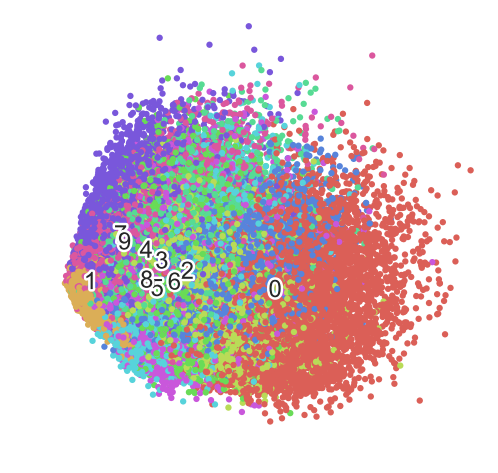

In [22]:
import matplotlib.pyplot as plt
fashion_scatter(top_two_comp.values, y) # Visualizing the PCA output

Text(0, 0.5, 'Second principle component')

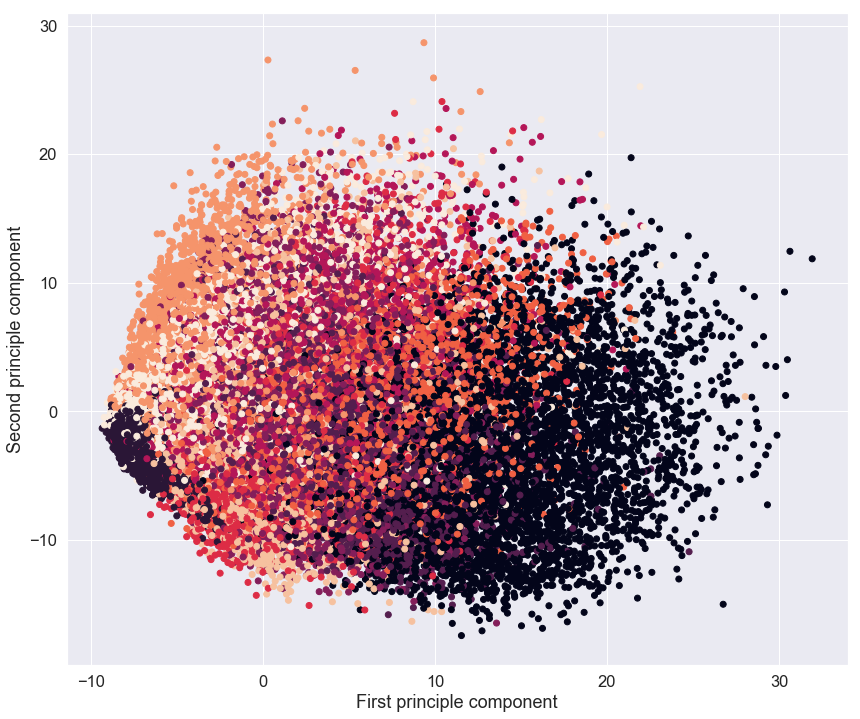

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.figure(figsize=(14,12))
plt.scatter(pca_matrix[:,0],pca_matrix[:,1],c=y)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

# Part-7 Find best $K$
Find the minimum value of $K$ with which the ratio between averaged squared projection error with total variation in data is less than 10% in other words we retain 90% of the variance. You can achieve this by repeating getKComponents with $K=1$ until the variance ratio is <= 10%.

In [24]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(scaled_data)

In [ ]:
#from sklearn.manifold import TSNE
#RS = 123
#fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

# Part-8: TSNE visualization
Finally, having found an optimal $K$ use these components as an input data to another dimensionality reduction method called tSNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) and reduce it to 2 dimensions.

In [25]:
from sklearn.manifold import TSNE
rndperm = np.random.permutation(mnist.data.shape[0])
n_sne = 10000 #it is sufficient if done for 10k samples
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50[:n_sne])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.047s...
[t-SNE] Computed neighbors for 10000 samples in 14.104s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.993802
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.693886
[t-SNE] KL divergence after 300 iterations: 2.713330


(<Figure size 576x576 with 1 Axes>,
 [Text(-0.8435403, -8.578774, '0'),
  Text(-6.2745934, 5.535348, '1'),
  Text(-3.6418312, -1.4355153, '2'),
  Text(0.19972345, -2.6677458, '3'),
  Text(3.085754, 2.634253, '4'),
  Text(5.3364973, -3.6027772, '5'),
  Text(-7.3829155, -4.261417, '6'),
  Text(2.6349363, 7.751717, '7'),
  Text(3.4397385, -0.91839945, '8'),
  Text(3.1526322, 4.966915, '9')])

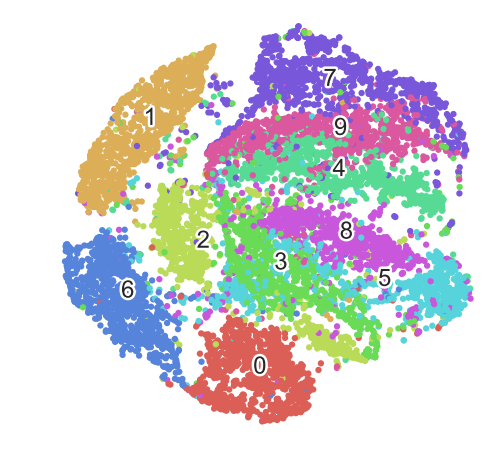

In [26]:
fashion_scatter(tsne_pca_results, y[0:10000])

Finally, scatter plot the components given by the tSNE using matplotlib compare it to the earlier scatter plot.

Text(0, 0.5, 'Second principle component')

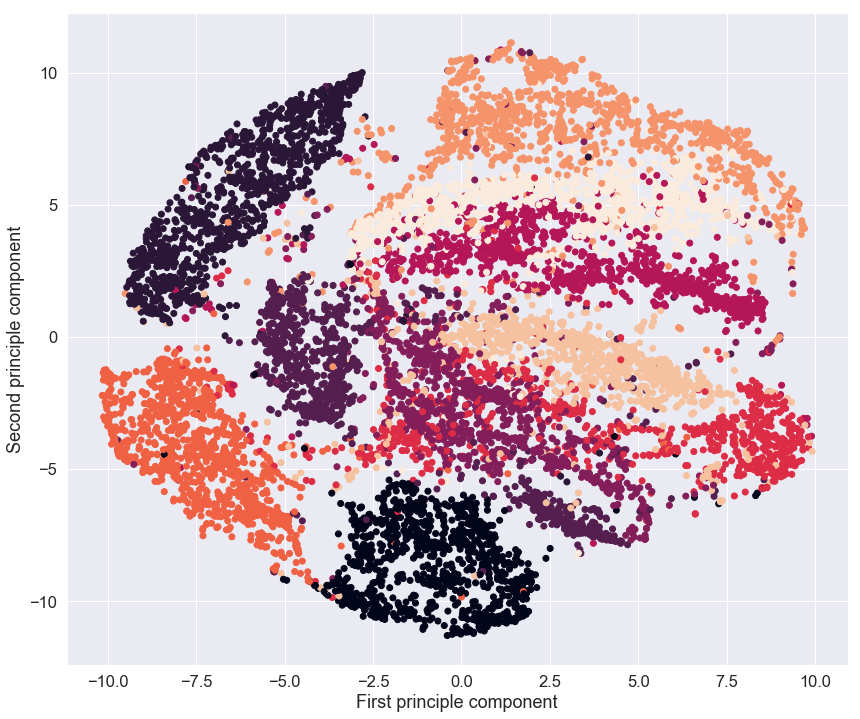

In [27]:
#TODO: Scatter plot the 2-dimensional tsne compoents with target as labels

plt.figure(figsize=(14,12))
plt.scatter(tsne_pca_results[:,0],tsne_pca_results[:,1],c=y[:10000])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')